In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
df=pd.read_csv('weather_disease_data.csv')

In [204]:
df.head(20)

,day,temp,rainfall_ml,humidity,disease_score
0,1,30,120,90,8
1,2,32,105,85,7
2,3,31,120,89,9
3,4,29,200,92,8
4,5,28,130,85,9
5,6,30,50,78,8
6,7,31,20,85,7
7,8,32,70,78,5
8,9,35,140,86,8
9,10,37,120,85,9


In [48]:
df['disease_level']=df.disease_score.map({9:'Severe', 8:'Severe', 7:'Severe', 6:'Moderate', 5:'Moderate', 4:'Moderate', 3:'Low', 2:'Low', 1:'Low', 0:'Low'})

In [201]:
df.tail(20)

,day,temp,rainfall_ml,humidity,disease_score,disease_level
29,30,24,45,72,2,Low
30,31,23,70,79,4,Moderate
31,32,26,65,80,1,Low
32,33,27,70,75,3,Low
33,34,22,60,76,4,Moderate
34,35,20,20,70,5,Moderate
35,36,18,0,65,3,Low
36,37,19,10,67,2,Low
37,38,19,15,75,1,Low
38,39,17,15,70,2,Low


In [200]:
df.shape

(49, 6)

In [57]:
X=df.iloc[:,[1,2,3,4]]
y=df.disease_level

In [54]:
X.head(3)

,temp,rainfall_ml,humidity,disease_score
0,30,120,90,8
1,32,105,85,7
2,31,120,89,9


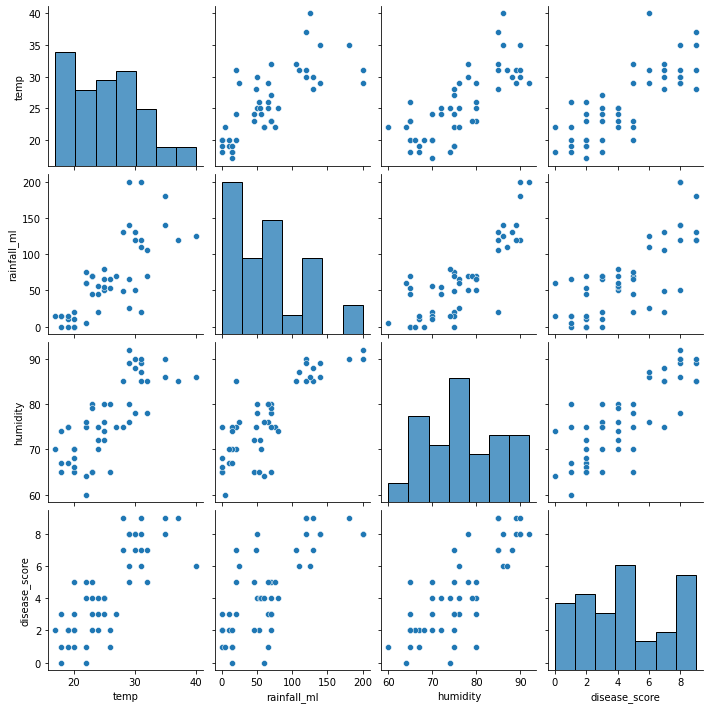

In [55]:
import seaborn as sns
sns.pairplot(X)

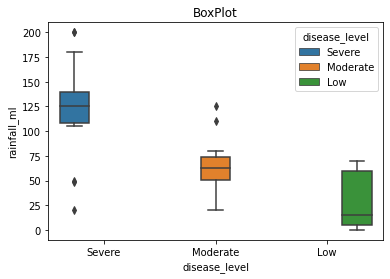

In [59]:
sns.boxplot(x="disease_level", y="rainfall_ml", data=df, hue='disease_level')
plt.title('BoxPlot')
plt.show()

In [63]:
df.describe()

,day,temp,rainfall_ml,humidity,disease_score
count,49.00000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,25.632653,65.530612,76.510204,4.448980
std,14.28869,5.502628,53.339362,8.612303,2.716165
min,1.00000,17.000000,0.000000,60.000000,0.000000
25%,13.00000,22.000000,20.000000,70.000000,2.000000
50%,25.00000,25.000000,60.000000,75.000000,4.000000
75%,37.00000,30.000000,105.000000,85.000000,7.000000
max,49.00000,40.000000,200.000000,92.000000,9.000000


In [61]:
df.dtypes

day               int64
temp              int64
rainfall_ml       int64
humidity          int64
disease_score     int64
disease_level    object
dtype: object

In [64]:
df.columns

Index(['day', 'temp', 'rainfall_ml', 'humidity', 'disease_score',
       'disease_level'],
      dtype='object')

In [66]:
df.isnull().sum()

day              0
temp             0
rainfall_ml      0
humidity         0
disease_score    0
disease_level    0
dtype: int64

C:\Users\Baki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


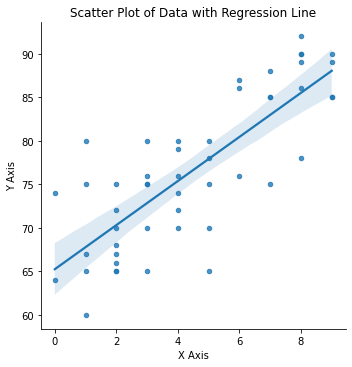

In [70]:
sns.lmplot('disease_score', 'humidity', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 20})

plt.title('Scatter Plot of Data with Regression Line')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

<AxesSubplot:xlabel='disease_score', ylabel='rainfall_ml'>

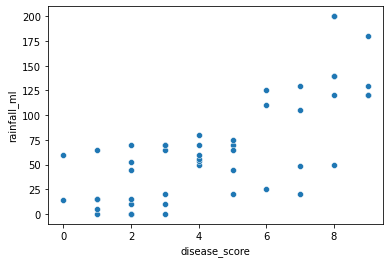

In [74]:
sns.scatterplot(x='disease_score', y='rainfall_ml', data=df)

In [180]:
X=df.iloc[:,[1,2,3]]
y=df.disease_level

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=20)

In [182]:
y_train

17    Moderate
0       Severe
33    Moderate
18    Moderate
46         Low
41         Low
36         Low
10    Moderate
3       Severe
40         Low
13      Severe
44         Low
2       Severe
25         Low
38         Low
5       Severe
42         Low
45         Low
30    Moderate
6       Severe
29         Low
16      Severe
19    Moderate
37         Low
43         Low
21    Moderate
32         Low
34    Moderate
7     Moderate
22    Moderate
11      Severe
20         Low
9       Severe
47         Low
28         Low
31         Low
15    Moderate
26    Moderate
35         Low
Name: disease_level, dtype: object

In [183]:
X_train.head(5)

,temp,rainfall_ml,humidity
17,29,25,76
0,30,120,90
33,22,60,76
18,31,110,87
46,23,70,65


In [184]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
clf=DecisionTreeClassifier()

In [191]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [192]:
y_predict=clf.predict(X_test)

In [193]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [194]:
accuracy_score(y_test, y_predict)

0.7

In [195]:
print("Classification report:\n", classification_report(y_test, y_predict))

Classification report:
               precision    recall  f1-score   support

         Low       0.75      1.00      0.86         3
    Moderate       0.33      0.50      0.40         2
      Severe       1.00      0.60      0.75         5

    accuracy                           0.70        10
   macro avg       0.69      0.70      0.67        10
weighted avg       0.79      0.70      0.71        10



In [196]:
confusion_matrix(y_test, y_predict)

array([[3, 0, 0],
       [1, 1, 0],
       [0, 2, 3]], dtype=int64)

<AxesSubplot:>

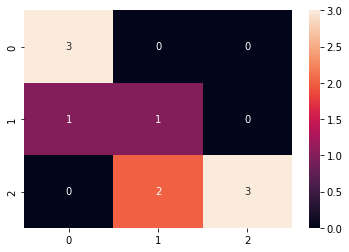

In [197]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)


In [206]:
clf.predict([[25, 90, 85]])

C:\Users\Baki\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Low'], dtype=object)